# <center> 📡 Telecom Customer Churn Prediction

- The Customer Churn table contains information on all ***7,043*** customers from a Telecommunications company in ***California*** in ***Q2 2022*** . 
- The purpose of this study is to analyze and predict the behavior of the customer if he churns or stays. 

***

## Table of contents :
* [Import Packages](#Import-Packages)
* [Configurations](#Configurations)
* [Read Data](#Read-Data)
* [Data Exploration](#Data-Exploration)
* [EDA](#EDA)
* [Feature Engineering](#Feature-Engineering)
* [Data Cleaning](#Data-Cleaning)
* [Visualization](#Visualization)
* [Prepare data for Pipeline (Classification)](#Prepare-data-for-Pipeline-(Classification))
* [Classification Pipeline](#Classification_Pipeline)
* [Prepare data for Pipeline (Regression)](#Prepare-data-for-Pipeline-(Regression))
* [Regression Pipeline](#Regression_Pipeline)
* [Deployment](#Deployment)


***

## Import Packages <a class="anchor" id="Import-Packages"></a>

In [1]:
import warnings 
import pandas as pd
import numpy as np
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
import joblib
import streamlit 

C:\Users\hp\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


## Configurations <a class="anchor" id="Configurations"></a>

In [2]:
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

## Read Data <a class="anchor" id="Read-Data"></a>

In [3]:
df = pd.read_csv('dataset/telecom_customer_churn.csv')

## Data Exploration<a class="anchor" id="Data-Exploration"></a>

In [4]:
df.shape

(7043, 38)

In [5]:
df.sample(10)

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
3825,5377-NDTOU,Female,26,Yes,0,San Pedro,90732,33.744119,-118.314480,3,71,Offer A,Yes,9.50,Yes,Yes,Cable,76.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Two Year,No,Credit Card,91.05,6293.75,0.00,0,674.50,6968.25,Stayed,NaN,NaN
236,0363-SVHYR,Male,28,Yes,3,Paramount,90723,33.897122,-118.164432,10,71,Offer A,Yes,10.11,Yes,Yes,DSL,59.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Two Year,No,Bank Withdrawal,86.85,6263.80,0.00,0,717.81,6981.61,Stayed,NaN,NaN
169,0270-THENM,Male,62,Yes,2,Mission Hills,91345,34.266389,-118.459744,1,72,NaN,Yes,28.37,Yes,Yes,DSL,18.0,Yes,Yes,Yes,Yes,No,No,No,Yes,Two Year,No,Bank Withdrawal,69.85,5102.35,25.24,0,2042.64,7119.75,Stayed,NaN,NaN
4597,6481-ESCNL,Female,33,No,0,Clayton,94517,37.881842,-121.848111,0,29,NaN,Yes,10.67,Yes,Yes,Fiber Optic,12.0,No,No,Yes,No,Yes,Yes,Yes,Yes,Month-to-Month,No,Bank Withdrawal,100.55,2878.75,0.00,0,309.43,3188.18,Stayed,NaN,NaN
4227,5965-GGPRW,Male,41,Yes,2,Hayward,94541,37.674002,-122.076796,5,72,Offer A,Yes,36.05,Yes,Yes,Fiber Optic,14.0,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Two Year,No,Bank Withdrawal,105.25,7609.75,0.00,0,2595.60,10205.35,Stayed,NaN,NaN
6393,9057-SIHCH,Female,48,No,0,Twentynine Palms,92278,34.457829,-116.139589,0,3,Offer E,Yes,9.95,Yes,Yes,Fiber Optic,13.0,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,96.60,291.90,0.00,0,29.85,321.75,Churned,Price,Price too high
2882,4110-PFEUZ,Female,54,No,0,Daggett,92327,34.875144,-116.821698,0,1,Offer E,Yes,29.78,No,Yes,Fiber Optic,13.0,No,No,No,No,No,No,No,Yes,Month-to-Month,No,Credit Card,69.55,69.55,0.00,0,29.78,99.33,Churned,Competitor,Competitor had better devices
5306,7501-IWUNG,Female,57,Yes,0,Springville,93265,36.245926,-118.693138,9,61,Offer B,Yes,1.27,No,Yes,DSL,24.0,No,No,Yes,Yes,Yes,Yes,Yes,No,Two Year,Yes,Bank Withdrawal,73.80,4616.05,49.51,30,77.47,4674.01,Stayed,NaN,NaN
4530,6380-ARCEH,Male,19,No,0,Inglewood,90304,33.936827,-118.359824,0,1,Offer E,Yes,41.10,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Month-to-Month,No,Credit Card,20.20,20.20,0.00,0,41.10,61.30,Joined,NaN,NaN
2752,3914-FDRHP,Male,25,No,0,Warner Springs,92086,33.323705,-116.626907,0,9,NaN,Yes,46.34,No,Yes,Fiber Optic,59.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,No,Bank Withdrawal,86.25,770.50,0.00,0,417.06,1187.56,Stayed,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              3166 non-null   objec

#### Check Duplication

In [7]:
df.duplicated().sum()

0

#### Check Null 

In [8]:
df.isna().any()

Customer ID                          False
Gender                               False
Age                                  False
Married                              False
Number of Dependents                 False
City                                 False
Zip Code                             False
Latitude                             False
Longitude                            False
Number of Referrals                  False
Tenure in Months                     False
Offer                                 True
Phone Service                        False
Avg Monthly Long Distance Charges     True
Multiple Lines                        True
Internet Service                     False
Internet Type                         True
Avg Monthly GB Download               True
Online Security                       True
Online Backup                         True
Device Protection Plan                True
Premium Tech Support                  True
Streaming TV                          True
Streaming M

#### Check df Columns Names

In [9]:
df.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')

#### Edit df Columns Names 

In [10]:
df.columns = df.columns.str.replace(' ',"")
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Married', 'NumberofDependents', 'City',
       'ZipCode', 'Latitude', 'Longitude', 'NumberofReferrals',
       'TenureinMonths', 'Offer', 'PhoneService',
       'AvgMonthlyLongDistanceCharges', 'MultipleLines', 'InternetService',
       'InternetType', 'AvgMonthlyGBDownload', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtectionPlan', 'PremiumTechSupport',
       'StreamingTV', 'StreamingMovies', 'StreamingMusic', 'UnlimitedData',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharge',
       'TotalCharges', 'TotalRefunds', 'TotalExtraDataCharges',
       'TotalLongDistanceCharges', 'TotalRevenue', 'CustomerStatus',
       'ChurnCategory', 'ChurnReason'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CustomerID                     7043 non-null   object 
 1   Gender                         7043 non-null   object 
 2   Age                            7043 non-null   int64  
 3   Married                        7043 non-null   object 
 4   NumberofDependents             7043 non-null   int64  
 5   City                           7043 non-null   object 
 6   ZipCode                        7043 non-null   int64  
 7   Latitude                       7043 non-null   float64
 8   Longitude                      7043 non-null   float64
 9   NumberofReferrals              7043 non-null   int64  
 10  TenureinMonths                 7043 non-null   int64  
 11  Offer                          3166 non-null   object 
 12  PhoneService                   7043 non-null   o

## EDA <a class="anchor" id="EDA"></a>

- drop 'CustomerID' there is no need for that column 
- Keep only values  from [0-3] in 'NumberofDependents' column
- Keep only values from [0-10] in 'NumberofReferrals' column 
- convert 'Gender' to category 
- convert 'Married' to category 
- replace 'None' with 'No Offer' in 'Offer' column 
- convert 'Offer' to category 
- convert 'PhoneService' to category 
- drop 'AvgMonthlyLongDistanceCharges' column 
- handle null in 'MultipleLines' column
- convert 'MultipleLines' to category 
- convert 'InternetService' to category 
- handle null in 'InternetType' column 
- convert 'InternetType' to category   
- handle null in 'AvgMonthlyGBDownload' column  
- handle null in 'OnlineSecurity' column 
- convert 'OnlineSecurity' to categroy 
- handle null in 'OnlineBackup' column 
- convert 'OnlineBackup' to categroy 
- handle null in 'DeviceProtectionPlan'
- convert 'DeviceProtectionPlan' to category 
- handle null in 'PremiumTechSupport'
- convert 'PremiumTechSupport' to category
- handle null in 'StreamingTV'
- convert 'StreamingTV' to category
- handle null in 'StreamingMovies'
- convert 'StreamingMovies' to category
- handle null in 'UnlimitedData'
- convert 'UnlimitedData' to category
- convert 'Contract' to category 
- convert 'PaperlessBilling' to category 
- convert 'PaymentMethod' to category 
- filter df to take data according to 'MonthlyCharge' > 0  
- drop 'TotalRefunds'
- drop 'TotalExtraDataCharges'
- drop 'TotalLongDistanceCharges'
- recategorize 'CustomerStatus'
- drop 'ChurnReason' column 

## Feature Engineering <a class="anchor" id="Feature-Engineering"></a>

> CustomerID

In [12]:
df['CustomerID'].nunique()

7043

> Gender

In [13]:
df['Gender'].value_counts()

Gender
Male      3555
Female    3488
Name: count, dtype: int64

> Age

In [14]:
df['Age'].describe()

count    7043.000000
mean       46.509726
std        16.750352
min        19.000000
25%        32.000000
50%        46.000000
75%        60.000000
max        80.000000
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Count'>

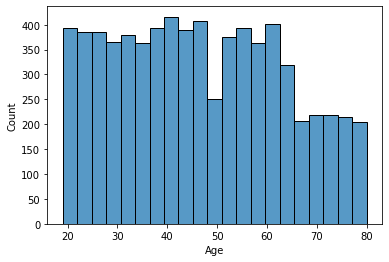

In [15]:
sns.histplot(df['Age'])

> Married

In [16]:
df['Married'].value_counts()

Married
No     3641
Yes    3402
Name: count, dtype: int64

> NumberofDependents

In [17]:
df['NumberofDependents'].isna().sum()

0

In [18]:
df['NumberofDependents'].describe()

count    7043.000000
mean        0.468692
std         0.962802
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         9.000000
Name: NumberofDependents, dtype: float64

In [19]:
df['NumberofDependents'].value_counts()

NumberofDependents
0    5416
1     553
2     531
3     517
5      10
4       9
6       3
7       2
9       1
8       1
Name: count, dtype: int64

In [20]:
# sns.kdeplot(df['NumberofDependents'])

> City

In [21]:
df['City'].str.lower().nunique()

1106

In [22]:
df['City'].str.lower().value_counts()

City
los angeles         293
san diego           285
san jose            112
sacramento          108
san francisco       104
                   ... 
johannesburg          2
south lake tahoe      2
jacumba               2
holtville             2
eldridge              2
Name: count, Length: 1106, dtype: int64

>NumberofReferrals

In [23]:
df['NumberofReferrals'].describe()

count    7043.000000
mean        1.951867
std         3.001199
min         0.000000
25%         0.000000
50%         0.000000
75%         3.000000
max        11.000000
Name: NumberofReferrals, dtype: float64

In [24]:
df['NumberofReferrals'].value_counts()

NumberofReferrals
0     3821
1     1086
5      264
3      255
7      248
9      238
2      236
4      236
10     223
6      221
8      213
11       2
Name: count, dtype: int64

> TenureinMonths

In [25]:
df['TenureinMonths'].describe()

count    7043.000000
mean       32.386767
std        24.542061
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: TenureinMonths, dtype: float64

In [26]:
df[['TenureinMonths','CustomerStatus']]

,TenureinMonths,CustomerStatus
0,9,Stayed
1,9,Stayed
2,4,Churned
3,13,Churned
4,3,Churned
...,...,...
7038,13,Stayed
7039,22,Churned
7040,2,Joined
7041,67,Stayed


In [27]:
## Whether he will stay or churn if tenure in month = 1
df[(df['TenureinMonths']<=1) & (df['CustomerStatus'] == 'Churned')]

,CustomerID,Gender,Age,Married,NumberofDependents,City,ZipCode,Latitude,Longitude,NumberofReferrals,TenureinMonths,Offer,PhoneService,AvgMonthlyLongDistanceCharges,MultipleLines,InternetService,InternetType,AvgMonthlyGBDownload,OnlineSecurity,OnlineBackup,DeviceProtectionPlan,PremiumTechSupport,StreamingTV,StreamingMovies,StreamingMusic,UnlimitedData,Contract,PaperlessBilling,PaymentMethod,MonthlyCharge,TotalCharges,TotalRefunds,TotalExtraDataCharges,TotalLongDistanceCharges,TotalRevenue,CustomerStatus,ChurnCategory,ChurnReason
19,0023-HGHWL,Male,67,No,0,Morgan Hill,95037,37.161544,-121.649371,0,1,NaN,No,NaN,NaN,Yes,Cable,9.0,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,25.10,25.10,0.0,0,0.00,25.10,Churned,Competitor,Competitor made better offer
25,0032-PGELS,Female,37,Yes,1,Palomar Mountain,92060,33.309852,-116.823091,1,1,NaN,No,NaN,NaN,Yes,DSL,19.0,Yes,No,No,No,No,No,No,Yes,Month-to-Month,No,Bank Withdrawal,30.50,30.50,0.0,0,0.00,30.50,Churned,Attitude,Attitude of service provider
63,0107-WESLM,Male,32,No,0,West Point,95255,38.419350,-120.469545,0,1,Offer E,Yes,31.77,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Month-to-Month,Yes,Bank Withdrawal,19.85,19.85,0.0,0,31.77,51.62,Churned,Attitude,Attitude of support person
64,0107-YHINA,Male,59,No,0,Los Angeles,90062,34.003553,-118.308933,0,1,NaN,Yes,40.71,Yes,Yes,Fiber Optic,25.0,No,No,Yes,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,99.75,99.75,0.0,0,40.71,140.46,Churned,Competitor,Competitor had better devices
86,0137-OCGAB,Female,25,No,0,Fairfield,94533,38.287136,-122.027110,0,1,Offer E,Yes,1.23,Yes,Yes,Fiber Optic,69.0,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Mailed Check,80.20,80.20,0.0,0,1.23,81.43,Churned,Price,Lack of affordable download/upload speed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6966,9885-CSMWE,Female,65,No,0,Los Angeles,90007,34.027337,-118.285150,0,1,Offer E,Yes,18.37,No,Yes,Fiber Optic,13.0,No,No,No,No,Yes,No,No,Yes,Month-to-Month,No,Bank Withdrawal,78.45,78.45,0.0,0,18.37,96.82,Churned,Dissatisfaction,Product dissatisfaction
6971,9894-EZEWG,Female,31,No,0,Walnut Grove,95690,38.240419,-121.587535,0,1,Offer E,Yes,39.66,No,Yes,Fiber Optic,8.0,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,74.30,74.30,0.0,0,39.66,113.96,Churned,Competitor,Competitor had better devices
6980,9907-SWKKF,Female,69,No,0,Twain,95984,40.022184,-121.062384,0,1,Offer E,No,NaN,NaN,Yes,DSL,21.0,No,No,No,No,No,No,No,Yes,Month-to-Month,No,Credit Card,25.05,25.05,0.0,0,0.00,25.05,Churned,Competitor,Competitor had better devices
7007,9940-RHLFB,Female,53,No,0,Sunset Beach,90742,33.719221,-118.073596,0,1,Offer E,Yes,26.06,No,Yes,Fiber Optic,3.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,No,Bank Withdrawal,75.30,75.30,0.0,0,26.06,101.36,Churned,Competitor,Competitor made better offer


<AxesSubplot:xlabel='TenureinMonths'>

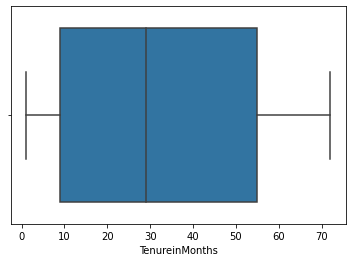

In [28]:
sns.boxplot(df['TenureinMonths'])

> Offer

In [29]:
df['Offer'].value_counts()

Offer
Offer B    824
Offer E    805
Offer D    602
Offer A    520
Offer C    415
Name: count, dtype: int64

> PhoneService

In [30]:
df['PhoneService'].value_counts()

PhoneService
Yes    6361
No      682
Name: count, dtype: int64

> AvgMonthlyLongDistanceCharges

In [31]:
df['AvgMonthlyLongDistanceCharges'].isna().sum()

682

In [32]:
df['AvgMonthlyLongDistanceCharges'].describe()

count    6361.000000
mean       25.420517
std        14.200374
min         1.010000
25%        13.050000
50%        25.690000
75%        37.680000
max        49.990000
Name: AvgMonthlyLongDistanceCharges, dtype: float64

> MultipleLines

In [33]:
df['MultipleLines'].value_counts()

MultipleLines
No     3390
Yes    2971
Name: count, dtype: int64

> InternetService

In [34]:
df['InternetService'].value_counts()

InternetService
Yes    5517
No     1526
Name: count, dtype: int64

> InternetType

In [35]:
df['InternetType'].isna().sum()

1526

In [36]:
df['InternetType'].value_counts()

InternetType
Fiber Optic    3035
DSL            1652
Cable           830
Name: count, dtype: int64

> AvgMonthlyGBDownload

In [37]:
df['AvgMonthlyGBDownload'].isna().sum()

1526

In [38]:
df['AvgMonthlyGBDownload'].describe()

count    5517.000000
mean       26.189958
std        19.586585
min         2.000000
25%        13.000000
50%        21.000000
75%        30.000000
max        85.000000
Name: AvgMonthlyGBDownload, dtype: float64

<AxesSubplot:xlabel='AvgMonthlyGBDownload'>

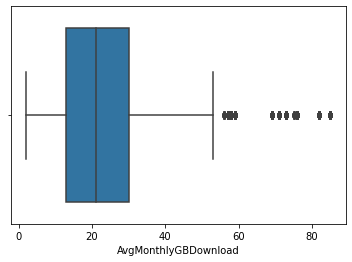

In [39]:
sns.boxplot(df['AvgMonthlyGBDownload'])

In [40]:
df[df['AvgMonthlyGBDownload']> 60]

,CustomerID,Gender,Age,Married,NumberofDependents,City,ZipCode,Latitude,Longitude,NumberofReferrals,TenureinMonths,Offer,PhoneService,AvgMonthlyLongDistanceCharges,MultipleLines,InternetService,InternetType,AvgMonthlyGBDownload,OnlineSecurity,OnlineBackup,DeviceProtectionPlan,PremiumTechSupport,StreamingTV,StreamingMovies,StreamingMusic,UnlimitedData,Contract,PaperlessBilling,PaymentMethod,MonthlyCharge,TotalCharges,TotalRefunds,TotalExtraDataCharges,TotalLongDistanceCharges,TotalRevenue,CustomerStatus,ChurnCategory,ChurnReason
5,0013-MHZWF,Female,23,No,3,Midpines,95345,37.581496,-119.972762,0,9,Offer E,Yes,16.77,No,Yes,Cable,73.0,No,No,No,Yes,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Credit Card,69.40,571.45,0.0,0,150.93,722.38,Stayed,NaN,NaN
50,0083-PIVIK,Male,25,No,0,Tulelake,96134,41.813521,-121.492666,0,64,NaN,Yes,5.49,Yes,Yes,DSL,69.0,Yes,Yes,Yes,Yes,Yes,No,No,No,One Year,No,Bank Withdrawal,81.25,5567.55,0.0,40,351.36,5958.91,Stayed,NaN,NaN
55,0096-BXERS,Female,30,Yes,0,Inverness,94937,38.099323,-122.945723,10,6,Offer E,Yes,42.66,Yes,Yes,Cable,85.0,No,No,No,No,No,No,No,Yes,Month-to-Month,No,Bank Withdrawal,50.35,314.55,0.0,0,255.96,570.51,Stayed,NaN,NaN
59,0103-CSITQ,Female,20,Yes,0,Modesto,95357,37.670526,-120.877572,10,57,Offer B,Yes,8.01,Yes,Yes,Fiber Optic,73.0,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,One Year,Yes,Bank Withdrawal,109.40,6252.70,0.0,0,456.57,6709.27,Stayed,NaN,NaN
86,0137-OCGAB,Female,25,No,0,Fairfield,94533,38.287136,-122.027110,0,1,Offer E,Yes,1.23,Yes,Yes,Fiber Optic,69.0,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Mailed Check,80.20,80.20,0.0,0,1.23,81.43,Churned,Price,Lack of affordable download/upload speed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6858,9743-DQKQW,Male,28,No,0,Escalon,95320,37.818543,-121.006907,0,3,Offer E,No,NaN,NaN,Yes,DSL,69.0,No,No,No,No,No,No,No,Yes,Month-to-Month,No,Bank Withdrawal,25.10,79.80,0.0,0,0.00,79.80,Joined,NaN,NaN
6949,9853-JFZDU,Female,20,Yes,0,Gold Run,95717,39.170376,-120.838404,7,35,NaN,Yes,20.79,No,Yes,DSL,69.0,No,Yes,No,Yes,No,No,No,Yes,Month-to-Month,No,Bank Withdrawal,56.85,1861.10,0.0,0,727.65,2588.75,Stayed,NaN,NaN
6951,9861-PDSZP,Female,19,No,0,Delano,93215,35.772244,-119.209689,0,72,NaN,Yes,10.05,Yes,Yes,Fiber Optic,82.0,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Two Year,Yes,Credit Card,108.05,7806.60,0.0,0,723.60,8530.20,Stayed,NaN,NaN
6973,9895-VFOXH,Female,19,No,0,Scotia,95565,40.440636,-124.098739,0,1,NaN,No,NaN,NaN,Yes,DSL,76.0,No,No,No,No,No,No,Yes,No,Month-to-Month,No,Credit Card,24.40,24.40,0.0,10,0.00,34.40,Joined,NaN,NaN


> OnlineSecurity

In [41]:
df['OnlineSecurity'].isna().sum()

1526

In [42]:
df['OnlineSecurity'].value_counts()

OnlineSecurity
No     3498
Yes    2019
Name: count, dtype: int64

>OnlineBackup

In [43]:
df['OnlineBackup'].isna().sum()

1526

In [44]:
df['OnlineBackup'].value_counts()

OnlineBackup
No     3088
Yes    2429
Name: count, dtype: int64

> DeviceProtectionPlan

In [45]:
df['DeviceProtectionPlan'].value_counts()

DeviceProtectionPlan
No     3095
Yes    2422
Name: count, dtype: int64

In [46]:
df['DeviceProtectionPlan'].isna().sum()

1526

> PremiumTechSupport

In [47]:
df['PremiumTechSupport'].isna().sum()

1526

In [48]:
df['PremiumTechSupport'].value_counts()

PremiumTechSupport
No     3473
Yes    2044
Name: count, dtype: int64

> StreamingTV

In [49]:
df['StreamingTV'].isna().sum()

1526

In [50]:
df['StreamingTV'].value_counts()

StreamingTV
No     2810
Yes    2707
Name: count, dtype: int64

> StreamingMovies

In [51]:
df['StreamingMovies'].isna().sum()

1526

In [52]:
df['StreamingMovies'].value_counts()

StreamingMovies
No     2785
Yes    2732
Name: count, dtype: int64

> StreamingMusic

In [53]:
df['StreamingMusic'].isna().sum()

1526

In [54]:
df['StreamingMusic'].value_counts( )

StreamingMusic
No     3029
Yes    2488
Name: count, dtype: int64

> UnlimitedData

In [55]:
df['UnlimitedData'].isna().sum()

1526

In [56]:
df['UnlimitedData'].value_counts()

UnlimitedData
Yes    4745
No      772
Name: count, dtype: int64

> Contract

In [57]:
df['Contract'].value_counts()

Contract
Month-to-Month    3610
Two Year          1883
One Year          1550
Name: count, dtype: int64

> PaperlessBilling

In [58]:
df['PaperlessBilling'].value_counts()

PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64

> PaymentMethod

In [59]:
df['PaymentMethod'].value_counts()

PaymentMethod
Bank Withdrawal    3909
Credit Card        2749
Mailed Check        385
Name: count, dtype: int64

> MonthlyCharge

In [60]:
df['MonthlyCharge'].describe()

count    7043.000000
mean       63.596131
std        31.204743
min       -10.000000
25%        30.400000
50%        70.050000
75%        89.750000
max       118.750000
Name: MonthlyCharge, dtype: float64

In [61]:
df[df['MonthlyCharge']<0]

,CustomerID,Gender,Age,Married,NumberofDependents,City,ZipCode,Latitude,Longitude,NumberofReferrals,TenureinMonths,Offer,PhoneService,AvgMonthlyLongDistanceCharges,MultipleLines,InternetService,InternetType,AvgMonthlyGBDownload,OnlineSecurity,OnlineBackup,DeviceProtectionPlan,PremiumTechSupport,StreamingTV,StreamingMovies,StreamingMusic,UnlimitedData,Contract,PaperlessBilling,PaymentMethod,MonthlyCharge,TotalCharges,TotalRefunds,TotalExtraDataCharges,TotalLongDistanceCharges,TotalRevenue,CustomerStatus,ChurnCategory,ChurnReason
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,9,NaN,Yes,10.69,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
32,0052-DCKON,Male,28,Yes,0,Los Angeles,90063,34.044271,-118.185237,9,66,NaN,Yes,43.77,Yes,Yes,Fiber Optic,41.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,One Year,No,Bank Withdrawal,-2.0,7942.15,0.00,0,2888.82,10830.97,Stayed,NaN,NaN
170,0274-JKUJR,Male,21,Yes,2,Los Angeles,90040,33.994524,-118.149953,9,7,Offer E,No,NaN,NaN,Yes,Cable,47.0,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Month-to-Month,No,Credit Card,-3.0,465.70,0.00,0,0.00,465.70,Stayed,NaN,NaN
232,0361-HJRDX,Female,38,No,0,Sherman Oaks,91403,34.147149,-118.463365,0,68,Offer A,No,NaN,NaN,Yes,DSL,28.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Two Year,No,Credit Card,-8.0,4539.60,0.00,130,0.00,4669.60,Stayed,NaN,NaN
336,0495-ZBNGW,Male,78,Yes,0,Loma Mar,94021,37.266388,-122.263080,1,5,NaN,Yes,6.66,Yes,Yes,Fiber Optic,14.0,No,No,Yes,No,No,No,No,No,Month-to-Month,Yes,Bank Withdrawal,-1.0,343.95,0.00,20,33.30,397.25,Churned,Competitor,Competitor offered more data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6894,9793-WECQC,Male,53,No,0,Foresthill,95631,39.031876,-120.811141,0,23,NaN,Yes,48.21,No,Yes,Fiber Optic,23.0,No,Yes,No,No,Yes,Yes,Yes,Yes,Month-to-Month,No,Credit Card,-1.0,2192.90,0.00,0,1108.83,3301.73,Stayed,NaN,NaN
6918,9821-BESNZ,Male,43,No,0,Northridge,91325,34.236683,-118.517588,0,66,Offer A,Yes,33.02,Yes,Yes,Fiber Optic,6.0,No,Yes,No,Yes,Yes,Yes,Yes,Yes,One Year,Yes,Bank Withdrawal,-7.0,6860.60,44.00,0,2179.32,8995.92,Stayed,NaN,NaN
6976,9898-KZQDZ,Female,65,Yes,0,Lee Vining,93541,37.890145,-119.184087,1,40,NaN,Yes,49.50,Yes,Yes,Fiber Optic,20.0,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Credit Card,-1.0,3640.45,0.00,0,1980.00,5620.45,Churned,Competitor,Competitor had better devices
7020,9961-JBNMK,Male,79,No,0,Desert Center,92239,33.889605,-115.257009,0,21,NaN,Yes,42.27,No,Yes,Fiber Optic,7.0,No,No,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,-1.0,2030.30,10.20,0,887.67,2907.77,Churned,Dissatisfaction,Product dissatisfaction


> TotalCharges

In [62]:
df['TotalCharges'].describe()

count    7043.000000
mean     2280.381264
std      2266.220462
min        18.800000
25%       400.150000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

<AxesSubplot:xlabel='TotalCharges'>

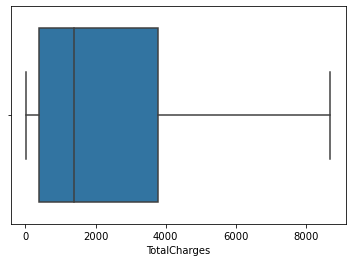

In [63]:
sns.boxplot(df['TotalCharges'])

> TotalRefunds

In [64]:
df['TotalRefunds'].describe()

count    7043.000000
mean        1.962182
std         7.902614
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        49.790000
Name: TotalRefunds, dtype: float64

<AxesSubplot:xlabel='TotalRefunds'>

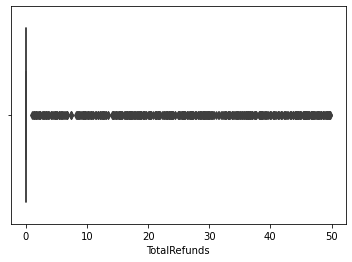

In [65]:
 sns.boxplot(df['TotalRefunds'])

> TotalExtraDataCharges

In [66]:
df['TotalExtraDataCharges'].describe()

count    7043.000000
mean        6.860713
std        25.104978
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       150.000000
Name: TotalExtraDataCharges, dtype: float64

<AxesSubplot:xlabel='TotalExtraDataCharges'>

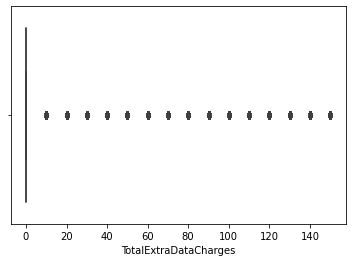

In [67]:
sns.boxplot(df['TotalExtraDataCharges'])

>TotalLongDistanceCharges

In [68]:
df['TotalLongDistanceCharges'].describe()

count    7043.000000
mean      749.099262
std       846.660055
min         0.000000
25%        70.545000
50%       401.440000
75%      1191.100000
max      3564.720000
Name: TotalLongDistanceCharges, dtype: float64

<AxesSubplot:xlabel='TotalLongDistanceCharges'>

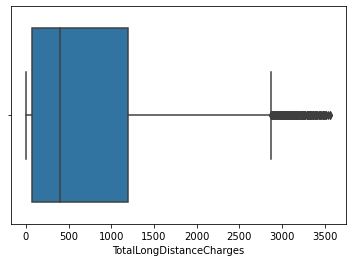

In [69]:
sns.boxplot(df['TotalLongDistanceCharges'])

> TotalRevenue 

In [70]:
df['TotalRevenue'].describe()

count     7043.000000
mean      3034.379056
std       2865.204542
min         21.360000
25%        605.610000
50%       2108.640000
75%       4801.145000
max      11979.340000
Name: TotalRevenue, dtype: float64

<AxesSubplot:xlabel='TotalRevenue'>

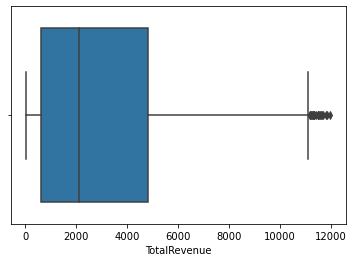

In [71]:
sns.boxplot(df['TotalRevenue'])

In [72]:
df[df['TotalRevenue']> 10000].shape

(123, 38)

> CustomerStatus

In [73]:
df['CustomerStatus'].value_counts()

CustomerStatus
Stayed     4720
Churned    1869
Joined      454
Name: count, dtype: int64

> ChurnCategory

In [74]:
df.shape[0] - df['ChurnCategory'].isna().sum() 

1869

In [75]:
df['ChurnReason'].value_counts()

ChurnReason
Competitor had better devices                313
Competitor made better offer                 311
Attitude of support person                   220
Don't know                                   130
Competitor offered more data                 117
Competitor offered higher download speeds    100
Attitude of service provider                  94
Price too high                                78
Product dissatisfaction                       77
Network reliability                           72
Long distance charges                         64
Service dissatisfaction                       63
Moved                                         46
Extra data charges                            39
Limited range of services                     37
Poor expertise of online support              31
Lack of affordable download/upload speed      30
Lack of self-service on Website               29
Poor expertise of phone support               12
Deceased                                       6
Name: co

> ChurnReason

In [76]:
df['ChurnReason'].value_counts()

ChurnReason
Competitor had better devices                313
Competitor made better offer                 311
Attitude of support person                   220
Don't know                                   130
Competitor offered more data                 117
Competitor offered higher download speeds    100
Attitude of service provider                  94
Price too high                                78
Product dissatisfaction                       77
Network reliability                           72
Long distance charges                         64
Service dissatisfaction                       63
Moved                                         46
Extra data charges                            39
Limited range of services                     37
Poor expertise of online support              31
Lack of affordable download/upload speed      30
Lack of self-service on Website               29
Poor expertise of phone support               12
Deceased                                       6
Name: co

##  Data Cleaning <a class="anchor" id="Data-Cleaning"></a>

#### Drop Unnecessary Columns 

In [77]:
df.drop(['CustomerID','ZipCode' , 'AvgMonthlyLongDistanceCharges','TotalRefunds','TotalExtraDataCharges','TotalLongDistanceCharges','TotalCharges','ChurnReason'] , axis=1 , inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                7043 non-null   object 
 1   Age                   7043 non-null   int64  
 2   Married               7043 non-null   object 
 3   NumberofDependents    7043 non-null   int64  
 4   City                  7043 non-null   object 
 5   Latitude              7043 non-null   float64
 6   Longitude             7043 non-null   float64
 7   NumberofReferrals     7043 non-null   int64  
 8   TenureinMonths        7043 non-null   int64  
 9   Offer                 3166 non-null   object 
 10  PhoneService          7043 non-null   object 
 11  MultipleLines         6361 non-null   object 
 12  InternetService       7043 non-null   object 
 13  InternetType          5517 non-null   object 
 14  AvgMonthlyGBDownload  5517 non-null   float64
 15  OnlineSecurity       

#### Keep only values  from [0-3] in 'NumberofDependents' column

In [78]:
df = df[df['NumberofDependents']<= 3].reset_index()

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7017 entries, 0 to 7016
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 7017 non-null   int64  
 1   Gender                7017 non-null   object 
 2   Age                   7017 non-null   int64  
 3   Married               7017 non-null   object 
 4   NumberofDependents    7017 non-null   int64  
 5   City                  7017 non-null   object 
 6   Latitude              7017 non-null   float64
 7   Longitude             7017 non-null   float64
 8   NumberofReferrals     7017 non-null   int64  
 9   TenureinMonths        7017 non-null   int64  
 10  Offer                 3153 non-null   object 
 11  PhoneService          7017 non-null   object 
 12  MultipleLines         6339 non-null   object 
 13  InternetService       7017 non-null   object 
 14  InternetType          5499 non-null   object 
 15  AvgMonthlyGBDownload 

In [80]:
df['NumberofDependents'].value_counts()

NumberofDependents
0    5416
1     553
2     531
3     517
Name: count, dtype: int64

#### Keep only values from [0-10] in 'NumberofReferrals' column 

In [81]:
df = df[df['NumberofReferrals']<11].reset_index()

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7015 entries, 0 to 7014
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   level_0               7015 non-null   int64  
 1   index                 7015 non-null   int64  
 2   Gender                7015 non-null   object 
 3   Age                   7015 non-null   int64  
 4   Married               7015 non-null   object 
 5   NumberofDependents    7015 non-null   int64  
 6   City                  7015 non-null   object 
 7   Latitude              7015 non-null   float64
 8   Longitude             7015 non-null   float64
 9   NumberofReferrals     7015 non-null   int64  
 10  TenureinMonths        7015 non-null   int64  
 11  Offer                 3152 non-null   object 
 12  PhoneService          7015 non-null   object 
 13  MultipleLines         6338 non-null   object 
 14  InternetService       7015 non-null   object 
 15  InternetType         

In [83]:
df['NumberofReferrals'].value_counts()

NumberofReferrals
0     3816
1     1082
5      261
3      254
7      247
4      236
9      235
2      233
10     221
6      219
8      211
Name: count, dtype: int64

In [84]:
df.shape

(7015, 32)

#### filter df to take data according to 'MonthlyCharge' > 0 

In [85]:
df = df[df['MonthlyCharge']>0]

In [86]:
df['MonthlyCharge'].describe()

count    6898.000000
mean       64.820107
std        30.106262
min        18.250000
25%        35.550000
50%        70.350000
75%        89.900000
max       118.750000
Name: MonthlyCharge, dtype: float64

<AxesSubplot:xlabel='MonthlyCharge'>

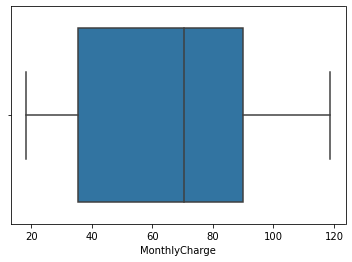

In [87]:
sns.boxplot(df['MonthlyCharge'])

#### Replace 'None' with 'No Offer' in 'Offer' column 

In [88]:
df['Offer'].fillna('No Offer',inplace=True)
df['Offer'].value_counts()

Offer
No Offer    3788
Offer B      812
Offer E      788
Offer D      590
Offer A      511
Offer C      409
Name: count, dtype: int64

In [89]:
df['Offer'].isna().sum()

0

#### Handle null in 'MultipleLines' column

In [90]:
df['MultipleLines'].isna().sum()

666

In [91]:
df[(df['MultipleLines'].isna() ) & (df['PhoneService'] == 'No')]

,level_0,index,Gender,Age,Married,NumberofDependents,City,Latitude,Longitude,NumberofReferrals,TenureinMonths,Offer,PhoneService,MultipleLines,InternetService,InternetType,AvgMonthlyGBDownload,OnlineSecurity,OnlineBackup,DeviceProtectionPlan,PremiumTechSupport,StreamingTV,StreamingMovies,StreamingMusic,UnlimitedData,Contract,PaperlessBilling,PaymentMethod,MonthlyCharge,TotalRevenue,CustomerStatus,ChurnCategory
10,10,10,Male,47,No,0,Rancho Santa Fe,32.993560,-117.207121,0,54,No Offer,No,NaN,Yes,Cable,10.0,Yes,No,No,Yes,Yes,No,No,Yes,Two Year,No,Credit Card,45.20,2460.55,Stayed,NaN
14,14,14,Female,39,No,0,Los Olivos,34.704340,-120.026090,0,56,No Offer,No,NaN,Yes,DSL,19.0,Yes,Yes,Yes,Yes,No,No,No,Yes,Two Year,No,Bank Withdrawal,45.05,2560.10,Stayed,NaN
16,16,16,Female,52,Yes,1,Point Reyes Station,38.060264,-122.830646,0,34,No Offer,No,NaN,Yes,DSL,20.0,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,One Year,No,Credit Card,61.25,1993.20,Stayed,NaN
19,19,19,Male,67,No,0,Morgan Hill,37.161544,-121.649371,0,1,No Offer,No,NaN,Yes,Cable,9.0,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,25.10,25.10,Churned,Competitor
25,25,25,Female,37,Yes,1,Palomar Mountain,33.309852,-116.823091,1,1,No Offer,No,NaN,Yes,DSL,19.0,Yes,No,No,No,No,No,No,Yes,Month-to-Month,No,Bank Withdrawal,30.50,30.50,Churned,Attitude
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6951,6953,6979,Female,75,No,0,Macdoel,41.769709,-121.920630,0,65,Offer B,No,NaN,Yes,Cable,9.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Two Year,Yes,Bank Withdrawal,53.50,3517.90,Stayed,NaN
6952,6954,6980,Female,69,No,0,Twain,40.022184,-121.062384,0,1,Offer E,No,NaN,Yes,DSL,21.0,No,No,No,No,No,No,No,Yes,Month-to-Month,No,Credit Card,25.05,25.05,Churned,Competitor
6968,6970,6996,Female,58,No,0,Sunset Beach,33.719221,-118.073596,0,12,Offer D,No,NaN,Yes,DSL,7.0,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Two Year,No,Credit Card,49.85,552.10,Stayed,NaN
6988,6990,7016,Male,23,Yes,0,Sunnyvale,37.421633,-122.009613,7,69,No Offer,No,NaN,Yes,DSL,42.0,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,One Year,Yes,Credit Card,60.80,4263.40,Stayed,NaN


In [92]:
df['MultipleLines'].fillna('No PhoneService',inplace=True)
df['MultipleLines'].isna().sum()

0

#### Handle null in categoty / numeric columns (related to 'InternetService' column)

In [93]:
# i want to check if customer doesn't join the internet service , his status will be 'churned' or his status will not be affcted 
# if so , i will work only on InternetService == 'Yes'
df[df['InternetService'] == 'No'][['InternetService','CustomerStatus']]

,InternetService,CustomerStatus
20,No,Stayed
23,No,Joined
24,No,Churned
27,No,Stayed
28,No,Stayed
...,...,...
6998,No,Stayed
7000,No,Stayed
7004,No,Stayed
7005,No,Joined


In [94]:
category_null_columns = ['InternetType' , 'OnlineSecurity','OnlineBackup','DeviceProtectionPlan','PremiumTechSupport','StreamingTV','StreamingMovies' ,'StreamingMusic','UnlimitedData']
for col in category_null_columns: 
    df[col].fillna('No Internet Service',inplace=True)
df['AvgMonthlyGBDownload'].fillna(0,inplace=True)

#### Recategorize 'CustomerStatus'

In [95]:
df['CustomerStatus'] = df['CustomerStatus'].replace("Joined","Stayed")
df['CustomerStatus'].value_counts()

CustomerStatus
Stayed     5064
Churned    1834
Name: count, dtype: int64

#### Convert to category 

In [96]:
category_list = ['Gender','Married','Offer','PhoneService','MultipleLines','InternetService','InternetType','DeviceProtectionPlan','PremiumTechSupport','StreamingTV','StreamingMovies','StreamingMusic','UnlimitedData','Contract','PaperlessBilling','PaymentMethod', 'OnlineBackup','OnlineSecurity','CustomerStatus']
for i in category_list : 
    df[i] = df[i].astype('category')

In [97]:
df.columns

Index(['level_0', 'index', 'Gender', 'Age', 'Married', 'NumberofDependents',
       'City', 'Latitude', 'Longitude', 'NumberofReferrals', 'TenureinMonths',
       'Offer', 'PhoneService', 'MultipleLines', 'InternetService',
       'InternetType', 'AvgMonthlyGBDownload', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtectionPlan', 'PremiumTechSupport',
       'StreamingTV', 'StreamingMovies', 'StreamingMusic', 'UnlimitedData',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharge',
       'TotalRevenue', 'CustomerStatus', 'ChurnCategory'],
      dtype='object')

#### drop ('level_0' 'index') columns 

In [98]:
df.drop(['level_0','index'],axis=1,inplace=True)

####  Save the cleaned dataset for the dashboard 

In [99]:
df.to_csv('dashboard/data/data_cleaned.csv')

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6898 entries, 0 to 7014
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Gender                6898 non-null   category
 1   Age                   6898 non-null   int64   
 2   Married               6898 non-null   category
 3   NumberofDependents    6898 non-null   int64   
 4   City                  6898 non-null   object  
 5   Latitude              6898 non-null   float64 
 6   Longitude             6898 non-null   float64 
 7   NumberofReferrals     6898 non-null   int64   
 8   TenureinMonths        6898 non-null   int64   
 9   Offer                 6898 non-null   category
 10  PhoneService          6898 non-null   category
 11  MultipleLines         6898 non-null   category
 12  InternetService       6898 non-null   category
 13  InternetType          6898 non-null   category
 14  AvgMonthlyGBDownload  6898 non-null   float64 
 15  OnlineSec

## Visualization <a class="anchor" id="Visualization"></a>

[Dashboard Github Repo](https://github.com/Shima-Mohammed/Customer-Churn-Epsilon-Dashboard.git)

[Dashboard](https://customer-churn-dashboard-gwxo.onrender.com/)

## Prepare data for Pipeline (Classification) <a class="anchor" id="Prepare-data-for-Pipeline-(Classification)"></a>

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6898 entries, 0 to 7014
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Gender                6898 non-null   category
 1   Age                   6898 non-null   int64   
 2   Married               6898 non-null   category
 3   NumberofDependents    6898 non-null   int64   
 4   City                  6898 non-null   object  
 5   Latitude              6898 non-null   float64 
 6   Longitude             6898 non-null   float64 
 7   NumberofReferrals     6898 non-null   int64   
 8   TenureinMonths        6898 non-null   int64   
 9   Offer                 6898 non-null   category
 10  PhoneService          6898 non-null   category
 11  MultipleLines         6898 non-null   category
 12  InternetService       6898 non-null   category
 13  InternetType          6898 non-null   category
 14  AvgMonthlyGBDownload  6898 non-null   float64 
 15  OnlineSec

#### drop 'ZipCode','Latitude','Longitude','City','ChurnCategory','ChurnReason'

In [102]:
df.drop(['Latitude','Longitude','City','ChurnCategory','TotalRevenue'], axis=1, inplace=True)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6898 entries, 0 to 7014
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Gender                6898 non-null   category
 1   Age                   6898 non-null   int64   
 2   Married               6898 non-null   category
 3   NumberofDependents    6898 non-null   int64   
 4   NumberofReferrals     6898 non-null   int64   
 5   TenureinMonths        6898 non-null   int64   
 6   Offer                 6898 non-null   category
 7   PhoneService          6898 non-null   category
 8   MultipleLines         6898 non-null   category
 9   InternetService       6898 non-null   category
 10  InternetType          6898 non-null   category
 11  AvgMonthlyGBDownload  6898 non-null   float64 
 12  OnlineSecurity        6898 non-null   category
 13  OnlineBackup          6898 non-null   category
 14  DeviceProtectionPlan  6898 non-null   category
 15  PremiumTe

#### create data frame for classification 

In [104]:
classification_df = df 

In [105]:
classification_df.head(10).to_csv('data_cleaned.csv')

#### split features and target (classification)

In [106]:
classification_features_cols = classification_df.drop(['CustomerStatus'] , axis=1)
classification_target_col = classification_df['CustomerStatus']
### one ==> stay
classification_target_col = pd.get_dummies(classification_target_col,drop_first=True)
bool_cols = classification_target_col.select_dtypes(include='bool').columns
classification_target_col[bool_cols] = classification_target_col[bool_cols].astype(int)
classification_target_col = classification_target_col.rename(columns={'Stayed': 'CustomerStatus'})
classification_target_col

,CustomerStatus
0,1
2,0
3,0
4,0
5,1
...,...
7010,1
7011,0
7012,1
7013,1


#### Handle imbalance Target (classification)

In [107]:
# Initialize RandomOverSampler
ros = RandomOverSampler(sampling_strategy='auto', random_state=42)

# Apply RandomOverSampler to the dataset
classification_features_cols, classification_target_col = ros.fit_resample(classification_features_cols, classification_target_col)

In [108]:
classification_target_col['CustomerStatus'].value_counts()

CustomerStatus
1    5064
0    5064
Name: count, dtype: int64

## Classification Pipeline <a class="anchor" id="Classification_Pipeline"></a>

In [109]:
## feature selection 
estimator = LogisticRegression()
RFE_selector = RFE(estimator)

#### scale data 
scaler = MinMaxScaler()
numeric_cols = classification_features_cols.select_dtypes(include='number').columns
#### category_columns
category_columns = classification_features_cols.select_dtypes(include='category').columns
## create preprocessor
preprocessor = ColumnTransformer(transformers=[('num', MinMaxScaler(),numeric_cols),
                                               ('cat', OneHotEncoder(sparse=False,drop='first'),category_columns)
                                              ])
##create Steps 
steps = list()
steps.append(('preprocessor', preprocessor))
# add feature selection
steps.append(('feature_selector', RFE_selector))  # RFE feature selection
# add model 
steps.append(('SVC',SVC(C=1.0, break_ties=False, cache_size=200)))
# Create the pipeline
pipeline = Pipeline(steps=steps)
### call cross_validate
cv_results = cross_validate(pipeline, classification_features_cols, classification_target_col, cv=5, return_train_score=True,scoring='accuracy')
pipeline.fit(classification_features_cols,classification_target_col)
joblib.dump(pipeline,"Classification_Model_Final.pkl")

['Classification_Model_Final.pkl']

In [110]:
cv_results

{'fit_time': array([5.77982402, 4.6120739 , 5.1458087 , 5.69960308, 4.980129  ]),
 'score_time': array([1.42107368, 1.08699608, 1.03003097, 1.48770237, 1.08930731]),
 'test_score': array([0.81737414, 0.82033564, 0.82477789, 0.81530864, 0.8345679 ]),
 'train_score': array([0.84115033, 0.83621328, 0.83942236, 0.83611008, 0.83512279])}

In [111]:
# ## feature selection 
# estimator = LogisticRegression()
# rfe = RFE(estimator)
# rfe.fit(features_cols,target_col)
# features_cols.columns[rfe.support_]
# ## Split Train, Test 
# X_train, X_test, y_train, y_test = train_test_split(features_cols,target_col , 
#                                    random_state=104,  
#                                    test_size=0.25) 
# #### scale data 
# scaler = MinMaxScaler()
# numeric_cols = X_train.select_dtypes(include='number').columns.to_list()
# X_train = pd.DataFrame(scaler.fit_transform(X_train.values), columns=numeric_cols)
# X_test = pd.DataFrame(scaler.fit_transform(X_test.values), columns=numeric_cols)
# ## Train model 
# models = {
#     "LogisticRegression":LogisticRegression(),
#     "GaussianNB":GaussianNB(),
#     "KNeighborsClassifier":KNeighborsClassifier(),
#     "DecisionTreeClassifier":DecisionTreeClassifier(),
#     "SVC":SVC()
# }

# for name,model in models.items():
#     model.fit(X_train,y_train)
#     y_pred = model.predict(X_test)
#     score_test = accuracy_score(y_test,y_pred)
#     y_pred = model.predict(X_train)
#     score_train = accuracy_score(y_train,y_pred)
#     print(f"The test accurace of {name} is {score_test*100}%")
#     print(f"The train accurace of {name} is {score_train*100}%")
#     print(30*"=")
# ## model 
# model = SVC()
# model.fit(X_train,y_train)
# y_pred = model.predict(X_test)

## Prepare data for Pipeline (Regression) <a class="anchor" id="Prepare-data-for-Pipeline-(Regression)"></a>

#### create dataframe for regression 

In [112]:
regression_df = df.drop(['CustomerStatus'] , axis=1)

#### split features and target (regression)

In [113]:
regression_features_cols = regression_df.drop(['MonthlyCharge'] , axis=1)
regression_target_col = regression_df[['MonthlyCharge']]
regression_target_col

,MonthlyCharge
0,65.60
2,73.90
3,98.00
4,83.90
5,69.40
...,...
7010,55.15
7011,85.10
7012,50.30
7013,67.85


## Regression Pipeline <a class="anchor" id="Regression_Pipeline"></a>

In [114]:
## feature selection 
estimator = LinearRegression()
RFE_selector = RFE(estimator)

#### scale data 
scaler = MinMaxScaler()
numeric_cols = regression_features_cols.select_dtypes(include='number').columns
#### category_columns
category_columns = regression_features_cols.select_dtypes(include='category').columns
## create preprocessor
preprocessor = ColumnTransformer(transformers=[('num', MinMaxScaler(),numeric_cols),
                                               ('cat', OneHotEncoder(sparse=False,drop='first'),category_columns)
                                              ])
##create Steps 
steps = list()
steps.append(('preprocessor', preprocessor))
# add feature selection
steps.append(('feature_selector', RFE_selector))  # RFE feature selection
# add model 
steps.append(('DTR',DecisionTreeRegressor()))
# Create the pipeline
pipeline = Pipeline(steps=steps)
### call cross_validate
cv_results = cross_validate(pipeline, regression_features_cols, regression_target_col, cv=5, return_train_score=True,scoring='r2')
pipeline.fit(regression_features_cols,regression_target_col)
joblib.dump(pipeline,"Regression_Model_Final.pkl")

['Regression_Model_Final.pkl']

In [115]:
# from sklearn.linear_model import LinearRegression
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.svm import SVR
# from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
# from xgboost import XGBRegressor
# from sklearn.metrics import r2_score
# ## get dummies 
# regression_features_cols = pd.get_dummies(regression_features_cols,drop_first=True)
# bool_cols = regression_features_cols.select_dtypes(include='bool').columns
# regression_features_cols[bool_cols] = regression_features_cols[bool_cols].astype(int)

# ## feature selection 
# estimator = LinearRegression()
# rfe = RFE(estimator)
# rfe.fit(regression_features_cols,regression_target_col)
# print(regression_features_cols.columns[rfe.support_])

# ## Split Train, Test 
# X_train, X_test, y_train, y_test = train_test_split(regression_features_cols,regression_target_col , 
#                                    random_state=104,  
#                                    test_size=0.25) 

# #### scale data 
# scaler = MinMaxScaler()
# numeric_cols = X_train.select_dtypes(include='number').columns.to_list()
# X_train = pd.DataFrame(scaler.fit_transform(X_train.values), columns=numeric_cols)
# X_test = pd.DataFrame(scaler.fit_transform(X_test.values), columns=numeric_cols)

# models = [
#     ('Linear Regression', LinearRegression()), 
#     ('DTR', DecisionTreeRegressor()), 
#     ('RFR', RandomForestRegressor()), 
#     ('ADA', AdaBoostRegressor()), 
#     ('GBR', GradientBoostingRegressor()), 
#     ('XGBR', XGBRegressor())
# ]
# for model_name, model in models:
#     model.fit(X_train,y_train)
#     y_pred = model.predict(X_test)
#     score_test = r2_score(y_test,y_pred)
#     y_pred = model.predict(X_train)
#     score_train = r2_score(y_train,y_pred)
#     print(f"The test accurace of {model_name} is {score_test*100}%")
#     print(f"The train accurace of {model_name} is {score_train*100}%")
#     print(30*"=")

# The test accurace of Linear Regression is 99.34842075492966%
# The train accurace of Linear Regression is 99.33977739425447%
# ==============================
# The test accurace of DTR is 98.60479669110944%
# The train accurace of DTR is 99.99990836540395%
# ==============================
# The test accurace of RFR is 99.16758038153174%
# The train accurace of RFR is 99.89545390738922%
# ==============================
# The test accurace of ADA is 94.9463485989354%
# The train accurace of ADA is 95.62032998171821%
# ==============================
# The test accurace of GBR is 99.36380147403202%
# The train accurace of GBR is 99.42815898354579%
# ==============================
# The test accurace of XGBR is 99.33819379944718%
# The train accurace of XGBR is 99.94996892882376%
# ==============================

# ==============================
# Index(['PhoneService_Yes', 'MultipleLines_No PhoneService',
#        'MultipleLines_Yes', 'InternetService_Yes', 'InternetType_Fiber Optic',
#        'InternetType_No Internet Service',
#        'OnlineSecurity_No Internet Service', 'OnlineSecurity_Yes',
#        'OnlineBackup_No Internet Service', 'OnlineBackup_Yes',
#        'DeviceProtectionPlan_No Internet Service', 'DeviceProtectionPlan_Yes',
#        'PremiumTechSupport_No Internet Service', 'PremiumTechSupport_Yes',
#        'StreamingTV_No Internet Service', 'StreamingTV_Yes',
#        'StreamingMovies_No Internet Service', 'StreamingMovies_Yes',
#        'StreamingMusic_No Internet Service',
#        'UnlimitedData_No Internet Service'],


## Deployment <a class="anchor" id="Deployment"></a>

[Deployment Github repo](https://github.com/Shima-Mohammed/Customer-Churn-Prediction-Deployment-Epsilon-Final-Project.git)

[Deployment](https://tele-customer-churn-prediction.streamlit.app/)